In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('/content/Copy of models.csv',delimiter=',')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

**Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe**

In [7]:
add = []
for i in list(df.columns):
  if len(df[i].unique()) == df.shape[0]:
    add.append(i)
    print(i)
    

Loan_ID


In [8]:
#drop column Loan_Id
df.drop('Loan_ID', axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Identifying Continous & Categorical Columns

In [9]:
#Continous
num_cols = df._get_numeric_data().columns
num_cols
for i in num_cols:
  if len(df[i].unique())> 50:# setting criteria for continous Columns
    print(str(i)+'\t'+str(len(df[i].unique())))



ApplicantIncome	505
CoapplicantIncome	287
LoanAmount	204


In [10]:
#Categorical
categorical = set(df.columns) - set(num_cols)
categorical

{'Dependents',
 'Education',
 'Gender',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed'}

**continuous** - Loan_ID , ApplicationIncome , LoanAmount , CoapplicantIncome **categorical** - Gender , Married , Education , Self_Employed , Loan_amount_term , Credit_History , Property_Area , Loan_Status


Performing Uni-variate Analysis with Plots.Record your Observations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbacf0d898>,
      dtype=object)

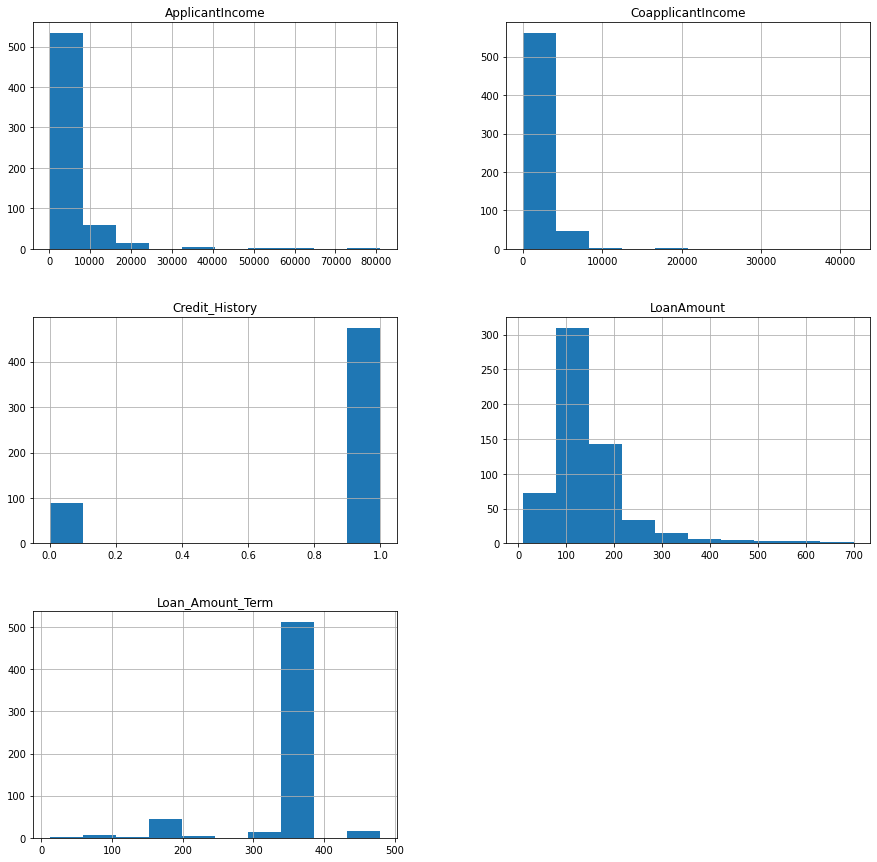

In [11]:
df.hist(figsize=[15,15])

Observations-
1. Approx 550 applicants have their income between (0 to 8000)
2. Nearly 560 coapplicants have their income between (0 to 5000)
3. The no of applicants who have taken loan in the past are nearly five times than others
4. rs 700 is the maximux loan amount sought by applicants

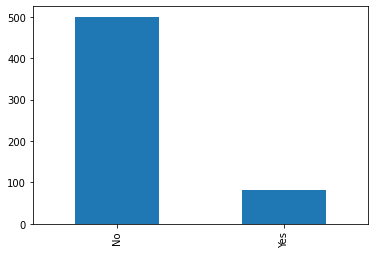

In [12]:
df['Self_Employed'].value_counts().plot.bar()

There are nearly 500 non self-employed applicants apply for loan 

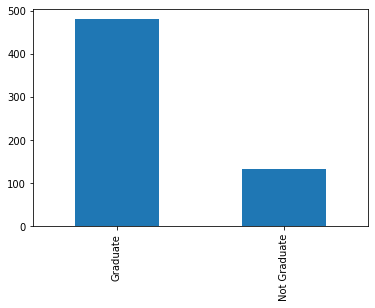

In [13]:
df['Education'].value_counts().plot.bar()

Mostly applicants are graduated but in spite of that they are non self-employed 

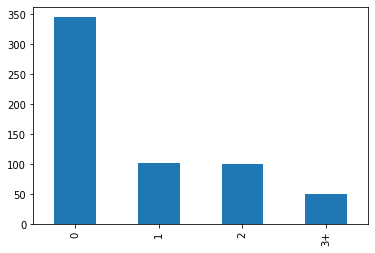

In [14]:
df['Dependents'].value_counts().plot.bar()

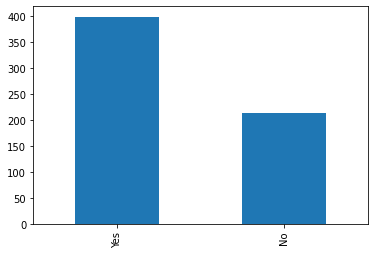

In [15]:
df['Married'].value_counts().plot.bar()

applicats those are married are more in number

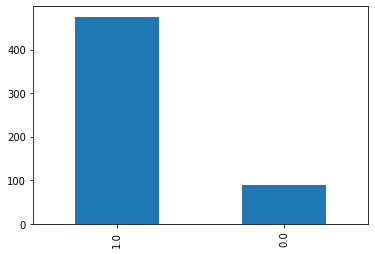

In [16]:
df['Credit_History'].value_counts().plot.bar()

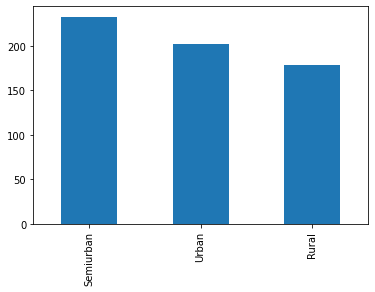

In [17]:
df['Property_Area'].value_counts().plot.bar()

nearly-
200 - belongs from Urban locality
200+ -belongs from semiurban locality
200- - belongs from Rural locality

Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

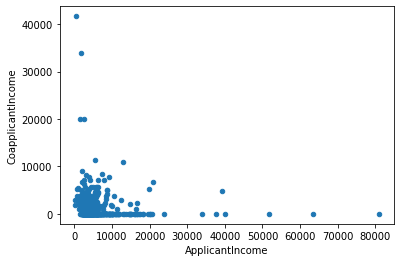

In [18]:
df.plot.scatter(x = 'ApplicantIncome', y = 'CoapplicantIncome')

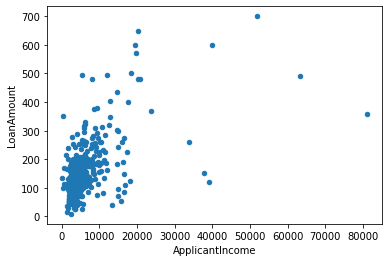

In [19]:
df.plot.scatter(x = 'ApplicantIncome', y = 'LoanAmount')

There are huge no of applicants apply for loan amt-Rs200, having income nearly 10000
there is only 1 person has income nearly 80000 and apply for loan(Rs-350)approx

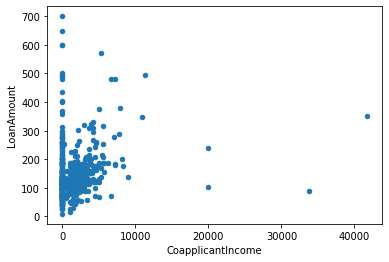

In [20]:
df.plot.scatter(x = 'CoapplicantIncome', y = 'LoanAmount')

Mostly Coapplicants those are unemployed, apply for loan amount between(0-300)

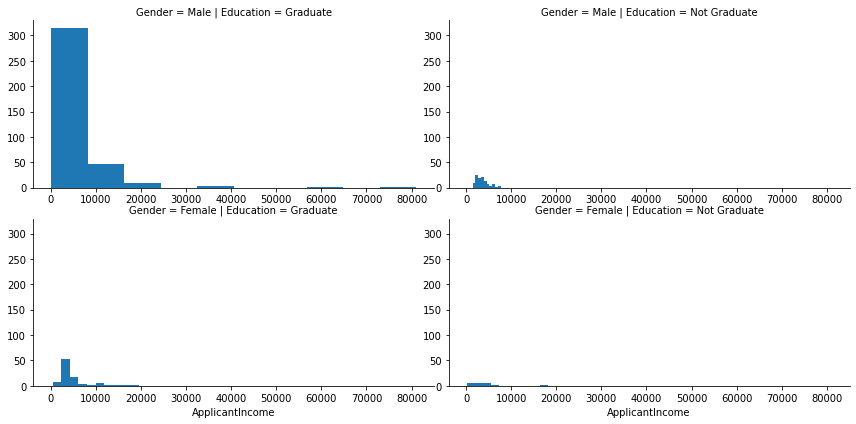

In [21]:
#Facetgrid plot
gp = ss.FacetGrid(df, col='Education',palette='GnB_d',gridspec_kws={'width_ratios':[4,4]},aspect=2, row='Gender')
gp = gp.map(plt.hist , 'ApplicantIncome')
for i in gp.axes.flatten():
  i.tick_params(labelbottom=True , labelleft= True)

1. Most of the request come from Male those actually Graduated
The number of female applicats (not graduated yet) are very few in numbers
2. Male applicants maximum salary is approx 80000
3. Very few applications come from those males, those actually not graduated yet

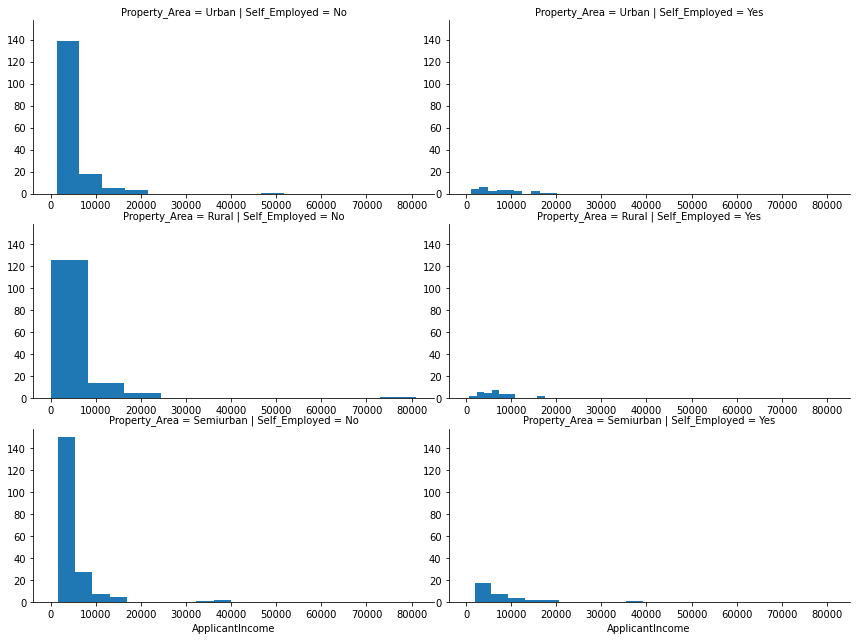

In [22]:
gp = ss.FacetGrid(df, col='Self_Employed',palette='GnB_d',gridspec_kws={'width_ratios':[4,4]},aspect=2, row='Property_Area')
gp = gp.map(plt.hist , 'ApplicantIncome')
for i in gp.axes.flatten():
  i.tick_params(labelbottom=True , labelleft= True)

1. Peoples belongs to Rural have their income more than other locality peoples 
1. There is only one people belongs to Rural area has income 80000 but actually not a self-employed

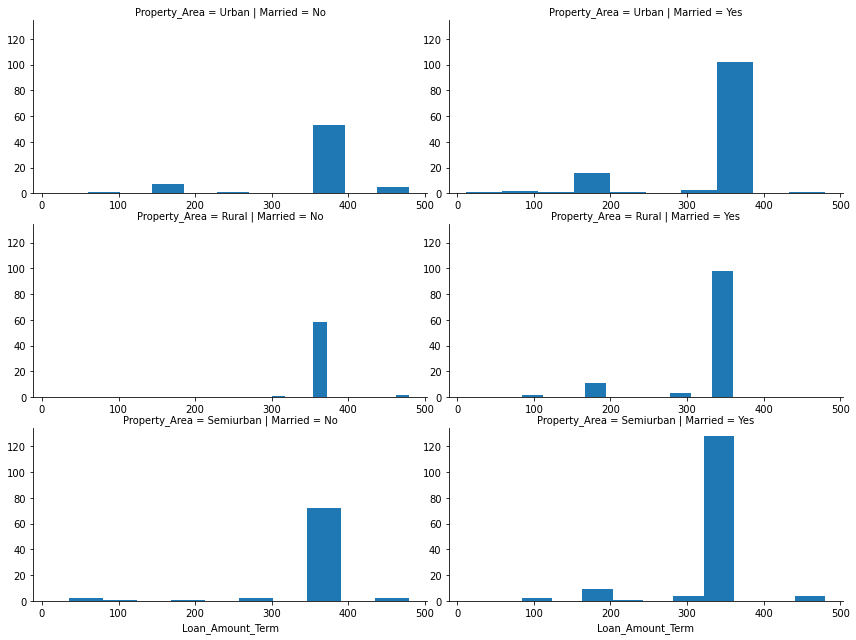

In [23]:
gp = ss.FacetGrid(df, col='Married',palette='GnB_d',gridspec_kws={'width_ratios':[4,4]},aspect=2, row='Property_Area')
gp = gp.map(plt.hist , 'Loan_Amount_Term')
for i in gp.axes.flatten():
  i.tick_params(labelbottom=True , labelleft= True)

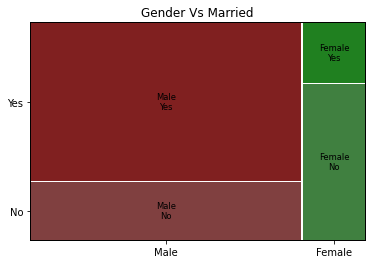

In [24]:
#Mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['Gender', 'Married'], title='Gender Vs Married')
plt.show()

Independent variables having missing values

In [25]:
for col in df.columns:
    pct_missing = (df[col].isnull()).value_counts()

pct_missing

False    614
Name: Loan_Status, dtype: int64

Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [26]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [27]:
df['LoanAmount'].describe()

count    592.000000
mean     146.413851
std       85.586932
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [28]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [29]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Use Box-Plot chart to represent the Outliers for each Independent Variable

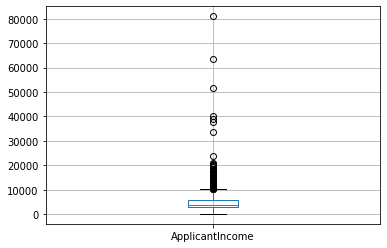

In [30]:
df.boxplot(column=['ApplicantIncome'])

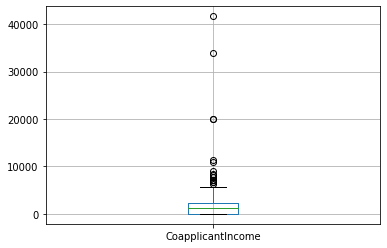

In [31]:
df.boxplot(column=['CoapplicantIncome'])

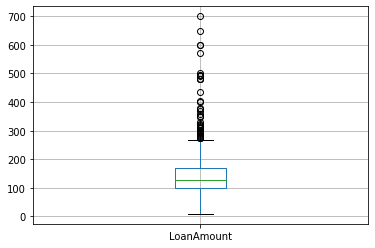

In [32]:
df.boxplot(column=['LoanAmount'])

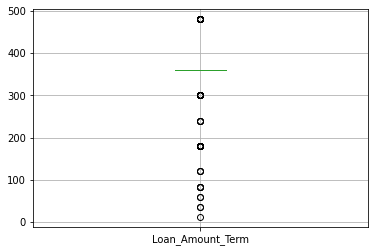

In [33]:
df.boxplot(column=['Loan_Amount_Term'])

**Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

*used technique - IQR* - remove outliers of one column

In [34]:
# Making copy of  dataset
df_cop = df.copy()
df_cop.head

<bound method NDFrame.head of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

In [35]:
Q1 = df_cop.quantile(0.25)
Q1
Q3 = df_cop.quantile(0.75)
Q3
IQR = Q3 - Q1  # calculation of IQR
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [36]:
# Removing outliers by rows of column name - CoapplicantIncome
y = df_cop['CoapplicantIncome']
removed_outliers = y.between(y.quantile(.25), y.quantile(.75)) #True shows these number of values are outliers
removed_outliers.value_counts()
df_cop.shape

(614, 13)

In [37]:
# Dropping the outliers
index_names = df_cop[~removed_outliers].index # INVERT removed_outliers!!
df_cop.drop(index_names , axis=0 , inplace=True)
df_cop.shape

(460, 13)

s**tep 1**
**Perform Label Encoding on Target Variable (Loan_Status)** 

In [43]:
# make copy of dataset
df_cop2 = df.copy()
df_cop2.head


<bound method NDFrame.head of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cop2['encoded_Loan_Status'] = le.fit_transform(df_cop2['Loan_Status'])
df_cop2.head

<bound method NDFrame.head of       Loan_ID  Gender Married  ... Property_Area Loan_Status encoded_Loan_Status
0    LP001002    Male      No  ...         Urban           Y                   1
1    LP001003    Male     Yes  ...         Rural           N                   0
2    LP001005    Male     Yes  ...         Urban           Y                   1
3    LP001006    Male     Yes  ...         Urban           Y                   1
4    LP001008    Male      No  ...         Urban           Y                   1
..        ...     ...     ...  ...           ...         ...                 ...
609  LP002978  Female      No  ...         Rural           Y                   1
610  LP002979    Male     Yes  ...         Rural           Y                   1
611  LP002983    Male     Yes  ...         Urban           Y                   1
612  LP002984    Male     Yes  ...         Urban           Y                   1
613  LP002990  Female      No  ...     Semiurban           N                   

In [45]:
df_cop2.shape


(614, 14)

In [40]:
categorical = list(categorical)
categorical

['Dependents',
 'Gender',
 'Education',
 'Loan_ID',
 'Property_Area',
 'Self_Employed',
 'Loan_Status',
 'Married']